In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('city_day.csv')

In [4]:
data.shape

(29531, 16)

In [5]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
data.drop(["AQI_Bucket"],axis=1,inplace=True)


In [7]:
data.isnull().sum()

City           0
Date           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

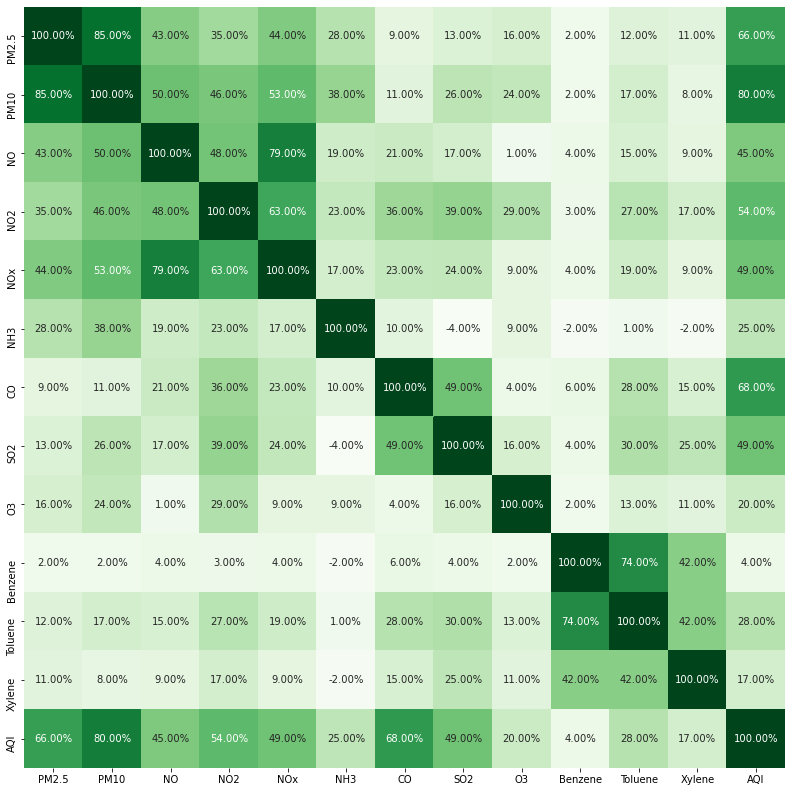

In [8]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(14,14))
sns.heatmap(correlation_matrix, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

In [9]:
data.drop(["City"],axis=1,inplace=True)


In [10]:
data.drop(["Date"],axis=1,inplace=True)


In [11]:
data.drop(["Benzene"],axis=1,inplace=True)


In [12]:
data.drop(["Xylene"],axis=1,inplace=True)


In [13]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,AQI
0,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.02,NaN
1,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,5.50,NaN
2,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,16.40,NaN
3,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,10.14,NaN
4,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,18.89,NaN


In [14]:
data.isnull().sum()

PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Toluene     8041
AQI         4681
dtype: int64

In [15]:
#remove observations whose AQI is NaN
data = data[data['AQI'].notna()]


In [16]:
data.shape


(24850, 11)

In [17]:
data = data[data['PM10'].notna()]


In [18]:
data.shape

(17764, 11)

In [19]:
data.isnull().sum()

PM2.5       618
PM10          0
NO          254
NO2         258
NOx        1120
NH3        1972
CO          327
SO2         470
O3          488
Toluene    5019
AQI           0
dtype: int64

In [20]:
data = data[data['NOx'].notna()]


In [21]:
data = data[data['NH3'].notna()]


In [22]:
data.drop(["Toluene"],axis=1,inplace=True)


In [23]:
data.shape


(14765, 10)

In [24]:
data.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
2010,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,52.0
2011,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,60.0
2012,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,62.0
2013,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,70.0
2014,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,54.0


In [25]:
data.isnull().sum()

PM2.5    148
PM10       0
NO        47
NO2      117
NOx        0
NH3        0
CO        75
SO2      228
O3       306
AQI        0
dtype: int64

In [26]:
data = data.fillna(data.mean())


In [27]:
data = data.reset_index(drop=True)


In [28]:
X = data.iloc[:,:9]

In [29]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3
0,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81
1,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18
2,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41
3,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30
4,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02


In [30]:
Y = data.iloc[:, -1]

In [31]:
Y.head()

0    52.0
1    60.0
2    62.0
3    70.0
4    54.0
Name: AQI, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [34]:
print("Coefficients : ",regressor.coef_)
print("Model Intercept : ",regressor.intercept_)

Coefficients :  [ 0.6707451   0.5138283  -0.02256467 -0.19336456  0.29085053  0.04085405
  9.12030302  0.22792549  0.25712542]
Model Intercept :  10.775436987845637


In [35]:
Y_pred = regressor.predict(X_test)

In [36]:
print('Training accuracy: ', regressor.score(X_train,Y_train)*100)

Training accuracy:  89.24827907371423


In [37]:
print('Model accuracy: ', regressor.score(X_test,Y_test)*100)

Model accuracy:  89.06964897127494


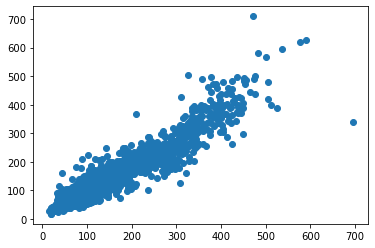

In [38]:
plt.scatter(Y_test, Y_pred)
plt.xlabel = 'Air Quality Index'
plt.ylabel = 'Predicted Air Quality Index'
plt.title = 'Air Quality Index Vs Predicted Air Quality Index'
plt.show()

In [39]:
y = np.array(Y_test)
y_p = np.array(Y_pred)
df = pd.DataFrame({"test": y, "predictions": y_p})
df.head(100)

,test,predictions
0,77.0,96.369927
1,174.0,170.041806
2,370.0,389.102952
3,86.0,98.890159
4,53.0,69.006193
...,...,...
95,303.0,280.293128
96,164.0,131.795356
97,118.0,129.283427
98,166.0,158.348677


In [41]:
#model evaluation
from sklearn.metrics import r2_score

print('R-squared Error:', r2_score(Y_test, Y_pred))

R-squared Error: 0.8906964897127494


<img src="aqi.png" width=300, height=200>